In [97]:
import pandas as pd
import numpy as np
from src.sup_data_to_fasta import load_xlsx
import networkx as nx
import matplotlib.pyplot as plt

from torch_geometric.datasets import TUDataset
import torch_geometric.utils as tg_utils

In [2]:
interactome_data_df_dict = load_xlsx('data/Liu_sup5_data.xlsx')

## Data Input

In order to use GNN models, we should convert the interactome data to a Tensor representing the adjacency matrix and branch and node features:

### Node Features

* Nucleotide Sequence k-mars frequency: as is common, we can use an approach similar to bag of words for text processing, where we can count words (kmers of a given size)

### Branch features

* Number of interactions: number of chimeras supporting interactions as described by Liu et al.

In [3]:
interactome_data_df = interactome_data_df_dict['EP-OD0.5']

In [30]:
def get_graph_from_df(df):
    graph = nx.Graph()
    for i, row in df.iterrows():
        graph.add_edge(row['RNA1 name'], row['RNA2 name'], interactions=row['Number of interactions'])
        graph.add_edge(row['RNA2 name'], row['RNA1 name'], interactions=row['Number of interactions'])  # Add the reverse edge
        
        # Add 'RNA1 seq' and 'RNA2 seq' as properties to graph node
        graph.nodes[row['RNA1 name']]['seq_len'] = len(row['RNA1 seq'])
        graph.nodes[row['RNA2 name']]['seq_len'] = len(row['RNA2 seq'])
        
    return graph

In [31]:
graph = get_graph_from_df(interactome_data_df)

In [37]:
def plot_interactome_graph(graph):

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Customize the node color, size, and shape
    node_color = 'skyblue'
    node_size = 20
    node_shape = 'o'

    # Customize the edge color and width
    edge_color = 'gray'
    edge_width = 0.5

    # Draw the graph with the customized parameters
    nx.draw(graph, with_labels=False, node_color=node_color, node_size=node_size, node_shape=node_shape,
        edge_color=edge_color, width=edge_width)

    # Add node properties as labels
    node_labels = {node: f"seq_len: {data['seq_len']}" for node, data in graph.nodes(data=True)}
    nx.draw_networkx_labels(graph, pos=nx.spring_layout(graph), labels=node_labels)

    # Add edge properties as labels
    edge_labels = nx.get_edge_attributes(graph, 'interactions')
    nx.draw_networkx_edge_labels(graph, pos=nx.spring_layout(graph), edge_labels=edge_labels)

    # Add a title to the plot
    plt.title('Interactome Graph')

    # Show the plot
    plt.show()


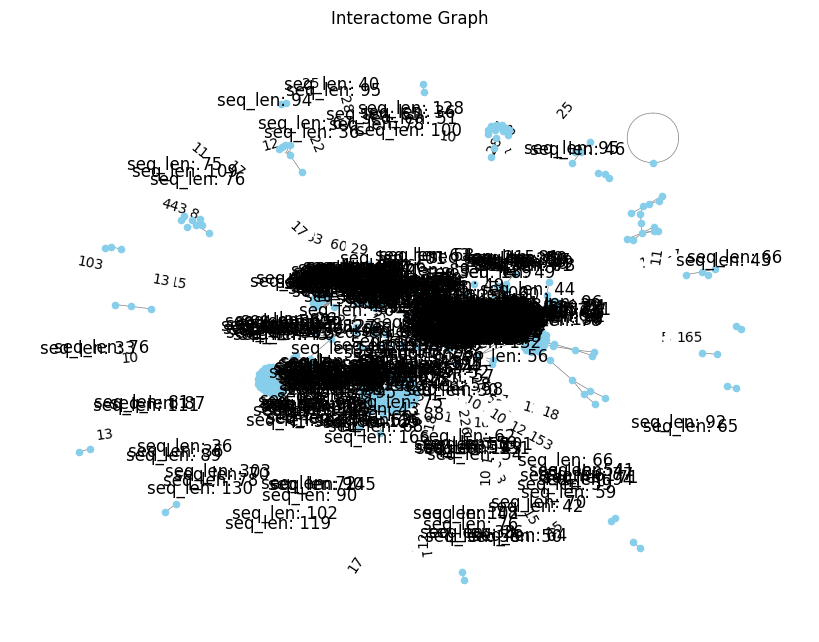

In [62]:
plot_interactome_graph(graph)

In [65]:
rna1_eq_rna2 = interactome_data_df[interactome_data_df["RNA1 name"] == interactome_data_df["RNA2 name"]]

In [79]:
rna1 = rna1_eq_rna2["RNA1 seq"].iloc[0]
rna2 = rna1_eq_rna2["RNA2 seq"].iloc[0]

In [88]:
len(rna2)

94

In [93]:
rna2

'GAAAACGGCGAATTCGTTGCGCACACCAGCCTGAAAGACACGACCGTTGGTCGCGCCATTCTGTGGATGATCGTACCGAAAGGTCTGCCTTTCT'

In [98]:
rna_aligned_range1 = np.array([4394212, 4394332])
rna_aligned_range2 = np.array([4393018, 4393111])

In [107]:
rna1_eq_rna2

,RNA1 name,RNA2 name,RNA1 Strand,RNA1 from,RNA1 to,RNA1 ligation from,RNA1 ligation to,RNA2 Strand,RNA2 from,RNA2 to,RNA2 ligation from,RNA2 ligation to,Number of interactions,Odds Ratio,Fisher's exact test p-value,RNA1 type,RNA2 type,RNA1 seq,RNA2 seq
396,rpoC(SL1344_4093),rpoC(SL1344_4093),+,4394211,4394296,4394317,4394331,+,4393037,4393110,--,--,25,3827.255821,1.420000e-42,CDS,CDS,AGCATCAAGCTCAGCAACGTGAAGTCGGTTGTGAACTCCAGCGGTA...,GAAAACGGCGAATTCGTTGCGCACACCAGCCTGAAAGACACGACCG...
